In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Dự đoán giá nhà


In [3]:
df = pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.isnull().mean()

No                                        0.0
X1 transaction date                       0.0
X2 house age                              0.0
X3 distance to the nearest MRT station    0.0
X4 number of convenience stores           0.0
X5 latitude                               0.0
X6 longitude                              0.0
Y house price of unit area                0.0
dtype: float64

In [29]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
df = df.drop('No', axis = 1)

## 1. Explore

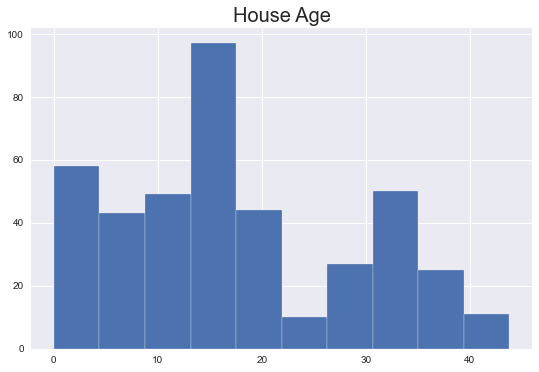

In [6]:
plt.style.use('seaborn')

plt.hist(df['X2 house age'], bins=10)
plt.title('House Age', size=20)
plt.show()

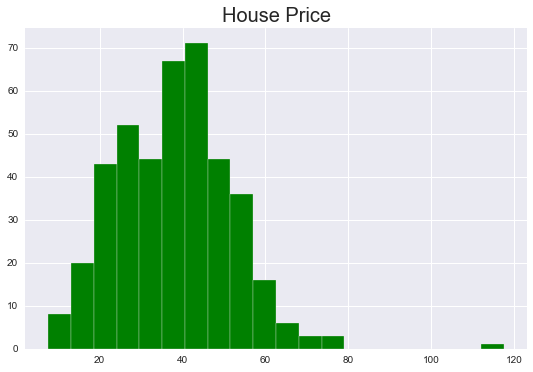

In [7]:
plt.hist(df['Y house price of unit area'], bins=20, color='g')
plt.title('House Price', size=20)
plt.show()

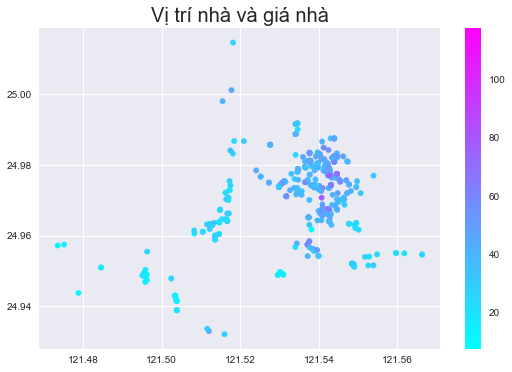

In [9]:
plt.scatter(df['X6 longitude'], df['X5 latitude'], 
                c=df['Y house price of unit area'],
                cmap='cool',
                s=30)
plt.title('Vị trí nhà và giá nhà', size=20)
plt.colorbar()
plt.show()

### Correlation

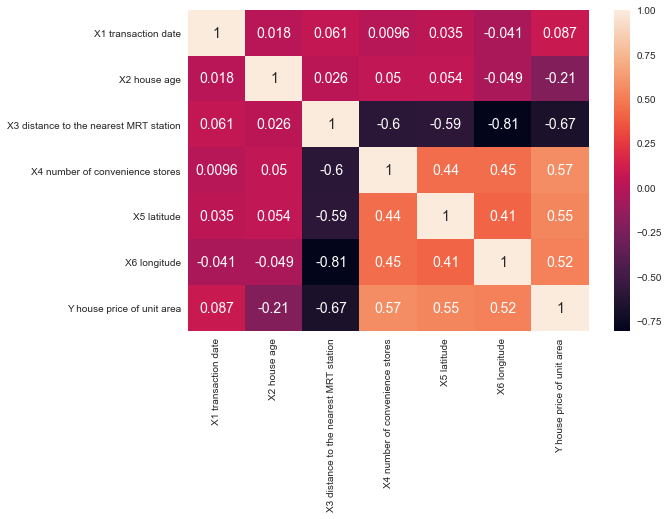

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Những yếu tốt nào ảnh hưởng nhất tới giá nhà?


In [31]:
ab_corr_matrix= abs(df.corr())
ab_corr_matrix.sort_values('Y house price of unit area', ascending=False)['Y house price of unit area']

Y house price of unit area                1.000000
X3 distance to the nearest MRT station    0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X2 house age                              0.210567
X1 transaction date                       0.087491
Name: Y house price of unit area, dtype: float64

- Khoảng cách từ nhà tới MRT
- Số cửa hàng tiện lợi gần nhà

## 2. Chuẩn bị data cho regression analysis

### a. Feature scaling


In [32]:
from sklearn.preprocessing import StandardScaler

house_age = df['X2 house age'].values.reshape(-1,1)
std_scaler = StandardScaler()
df['X2 house age'] = std_scaler.fit_transform(house_age)

Mean of house_age is:  -6.704245317784762e-17
STD of house_age is:  1.0012099217976482


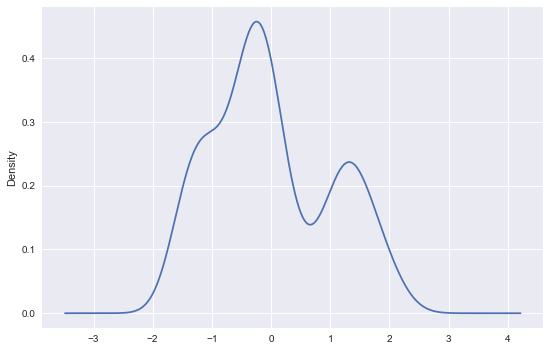

In [58]:
print('Mean of house_age is: ', df['X2 house age'].mean())
print('STD of house_age is: ', df['X2 house age'].std())
df['X2 house age'].plot(kind='density')
plt.show()

### b. Preprocessing pipeline

In [110]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,1.255628,84.87882,10,24.98298,121.54024,37.9
1,2012.917,0.157086,306.59470,9,24.98034,121.53951,42.2
2,2013.583,-0.387791,561.98450,5,24.98746,121.54391,47.3
3,2013.500,-0.387791,561.98450,5,24.98746,121.54391,54.8
4,2012.833,-1.117223,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,-0.352637,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,-1.064493,90.45606,9,24.97433,121.54310,50.0
411,2013.250,0.095568,390.96960,7,24.97923,121.53986,40.6
412,2013.000,-0.844784,104.81010,5,24.96674,121.54067,52.5


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [15]:
df = pd.read_csv('Real estate.csv', header=0)
df = df.drop('No', axis=1)
num_cols = list(df.select_dtypes(['float64']).columns)
num_cols.remove('Y house price of unit area')
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols)
])

features = full_pipeline.fit_transform(df)
features = pd.DataFrame(data=features, columns=num_cols)
targets = df['Y house price of unit area']
features.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.834188,0.592937


## 3. Regression analysis

### a. Feature selection. Chi-square test

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selected_features = []

selector = SelectKBest(f_regression, k='all')
selector.fit_transform(features, targets)

supports = selector.get_support()  
# if support is True, the column is selected

print(supports)
print(features.columns)

[ True  True  True  True  True]
Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station', 'X5 latitude',
       'X6 longitude'],
      dtype='object')


In [35]:
for support, feature in zip(supports, features.columns):
    if (support == True):
        selected_features.append(feature)

print('Selected features are: ', selected_features)

Selected features are:  ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']


### b. Regression models

###  Simple regression model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
model = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(features, targets)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('The RMSE is: ', rmse)

The RMSE is:  11.081842793241782


### Ridge regression

In [40]:
model = Ridge(alpha=0.5)

X_train, X_test, Y_train, Y_test = train_test_split(features, targets)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('The RMSE is: ', rmse)

The RMSE is:  8.765486520377504


### Lasso regression

In [39]:
model = Lasso(alpha=0.5)

X_train, X_test, Y_train, Y_test = train_test_split(features, targets)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('The RMSE is: ', rmse)

The RMSE is:  9.344869208903008


## 4. Cross Validation

In [36]:
model = LinearRegression()

scores = cross_val_score(model, features, targets, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)

print('AVG RMSE after CV of LinearRegression is :', rmse.mean())

AVG RMSE after CV of LinearRegression is : 9.048127619802898


In [37]:
model = Ridge()

scores = cross_val_score(model, features, targets, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)

print('AVG RMSE after CV of Ridge is :', rmse.mean())

AVG RMSE after CV of Ridge is : 9.047665154730899


In [38]:
model = Lasso()

scores = cross_val_score(model, features, targets, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)

print('AVG RMSE after CV of Lasso is :', rmse.mean())

AVG RMSE after CV of Lasso is : 9.218705777061883


## 5. Fine-tune model


In [48]:
# Find the optimal set of hyperparameters for Ridge and Lasso regression,
# using Cross validation

ridge = Ridge()
lasso = Lasso()
hyperparams = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

grid_search = GridSearchCV(ridge, hyperparams, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(features, targets)
print('Best set of hyperparameters for Ridge: ', grid_search.best_params_)

grid_search = GridSearchCV(lasso, hyperparams, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(features, targets)
print('Best set of hyperparameters for Lasso: ', grid_search.best_params_)

Best set of hyperparameters for Ridge:  {'alpha': 1.0}
Best set of hyperparameters for Lasso:  {'alpha': 0.1}


## 6. Final model and result

The final RMSE of the best model is:  8.332563647717919
The correlation between actual and predictd values is  0.7377266493767232


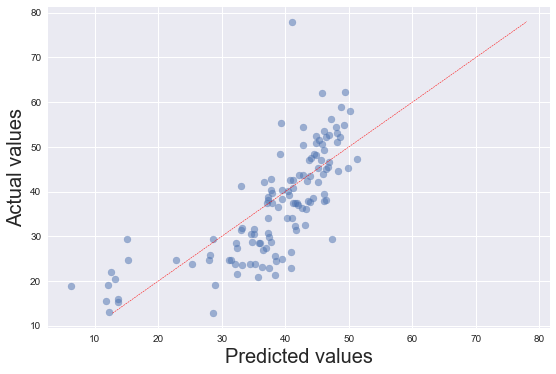

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

final_model = Ridge(alpha=1.0)
final_model.fit(X_train, Y_train)
predictions = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(predictions, Y_test))
corr = np.corrcoef(predictions, Y_test)

print('The final RMSE of the best model is: ', rmse)
print('The correlation between actual and predictd values is ', corr[0,1])

plt.scatter(predictions, Y_test, alpha=0.5)

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=0.5)
plt.xlabel('Predicted values', size=20)
plt.ylabel('Actual values', size=20)
plt.show()

# END

SyntaxError: invalid syntax (<ipython-input-57-1ea780748fa0>, line 1)